# This is heart disease predection project

# 1-problem defination
# 2-data
# 3-Evaluate
# 4-features
# 5-modelling
# 6-Experimentation

# 1-problem defination
We need to predict on the basis of given data wather someone have heart disease or not

# 2-data
We have data and already loaded it

# 3-Evaluate
  In initial stages we need to make sure if our model gave us the accuracy of 95%

# 4-Features
What features are important, and what features column means what.

14 of 14 columns

age: Age

sex: Sex

cp: Chest pain (typical, asymptotic, nonanginal, nontypical)

trestbps:
Resting blood pressure

chol:
Serum cholestoral in mg/dl

fbs:
Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg:
Resting electrocardiographic results

thalach:
Maximum heart rate achieved

exang:
Exercise induced angina (1 = yes; 0 = no)

oldpeak:
ST depression induced by exercise relative to rest

slope:
Slope of the peak exercise ST segment

ca:
Number of major vessels colored by flourosopy (0 - 3)

thal:
3 = normal; 6 = fixed defect; 7 = reversable defect)

target:
AHD - Diagnosis of heart disease (1 = yes; 0 = no)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# importing model of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# import evaluation libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Exploring the data initial stage
1-what problem i am going to solve.
2-what kind of data i have.
3-does this data have missing values.
4-are there any outlier, sporious vectors
5-can we add or remove some of the features.

In [3]:
df = pd.read_csv("heart.csv")
df.shape

(303, 14)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

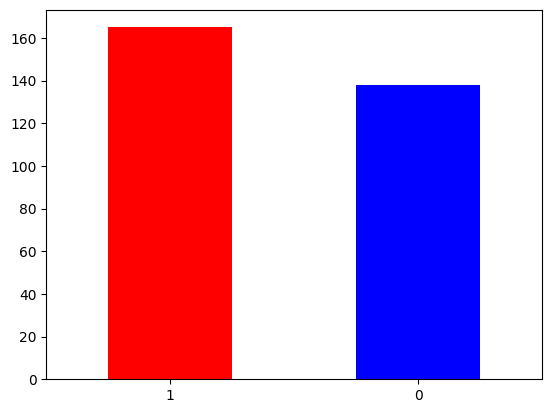

In [10]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"])
plt.xticks(rotation=0);

In [11]:
df.isna().sum() #Are there any missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
len(df)

303

In [15]:
207/303

0.6831683168316832

In [16]:
96/303

0.31683168316831684

In [17]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [18]:
72/96

0.75

In [19]:
93/207

0.4492753623188406

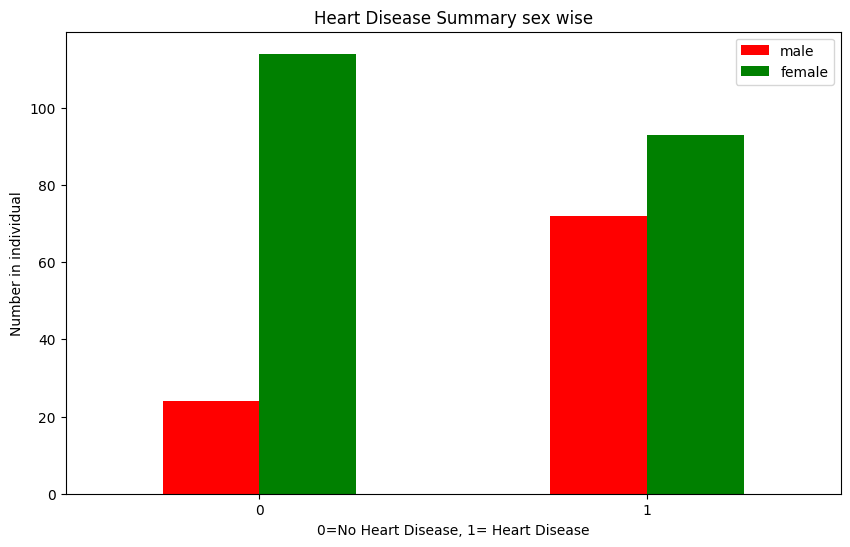

In [20]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                figsize=(10, 6),
                                color=["red","green"])
plt.title("Heart Disease Summary sex wise")
plt.xlabel("0=No Heart Disease, 1= Heart Disease")
plt.ylabel("Number in individual")
plt.legend(["male", "female"])
plt.xticks(rotation=0);

In [21]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

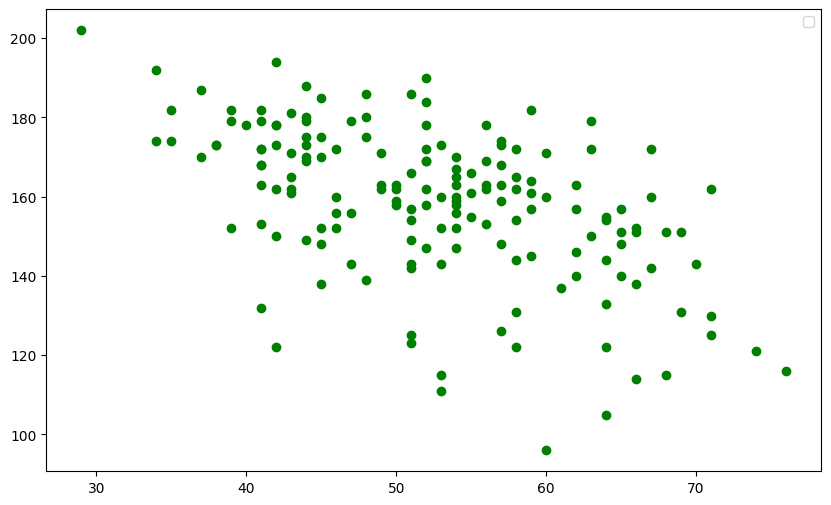

In [22]:
# finding pattern in data using scatter plot
plt.figure(figsize=(10, 6))
# create scatter plot
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="green")
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend("");

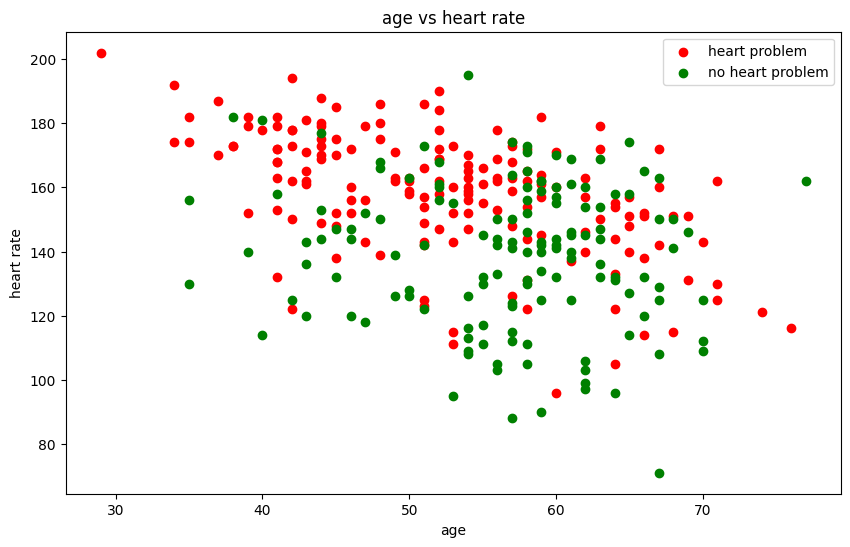

In [23]:
# finding pattern in data using scatter plot
plt.figure(figsize=(10, 6))
# create scatter plot
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="red")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="green")
plt.title("age vs heart rate")
plt.xlabel("age")
plt.ylabel("heart rate")
plt.legend(["heart problem", "no heart problem"]);

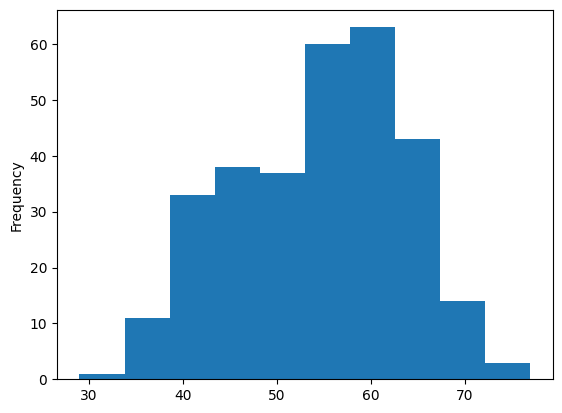

In [24]:
# create histogram to see age distribution
df.age.plot.hist();

# cp: chest pain type
        -- Value 0: typical angina
        -- Value 1: atypical angina
        -- Value 2: non-anginal pain
        -- Value 3: asymptomatic

In [25]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


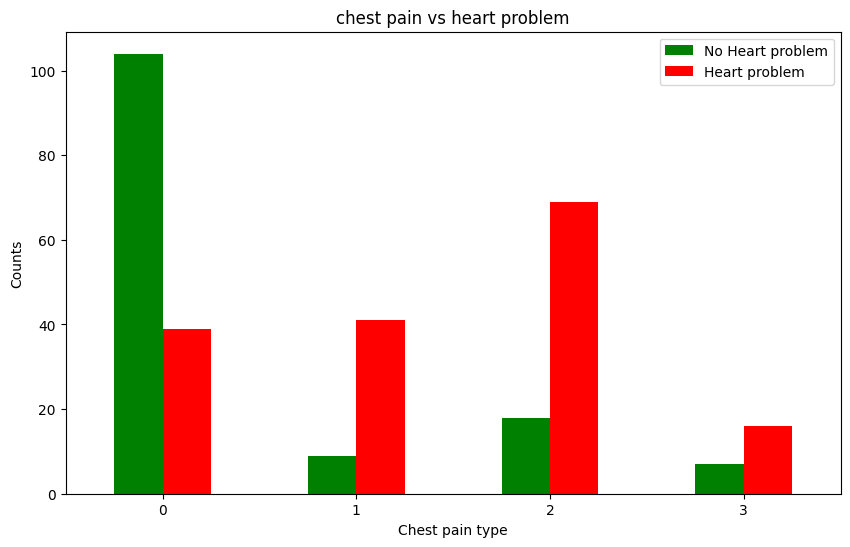

In [26]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                              color=["green", "red"],
                              figsize=(10 ,6))
plt.title("chest pain vs heart problem")
plt.xlabel("Chest pain type")
plt.ylabel("Counts")
plt.legend(["No Heart problem", "Heart problem"])
plt.xticks(rotation=0);

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


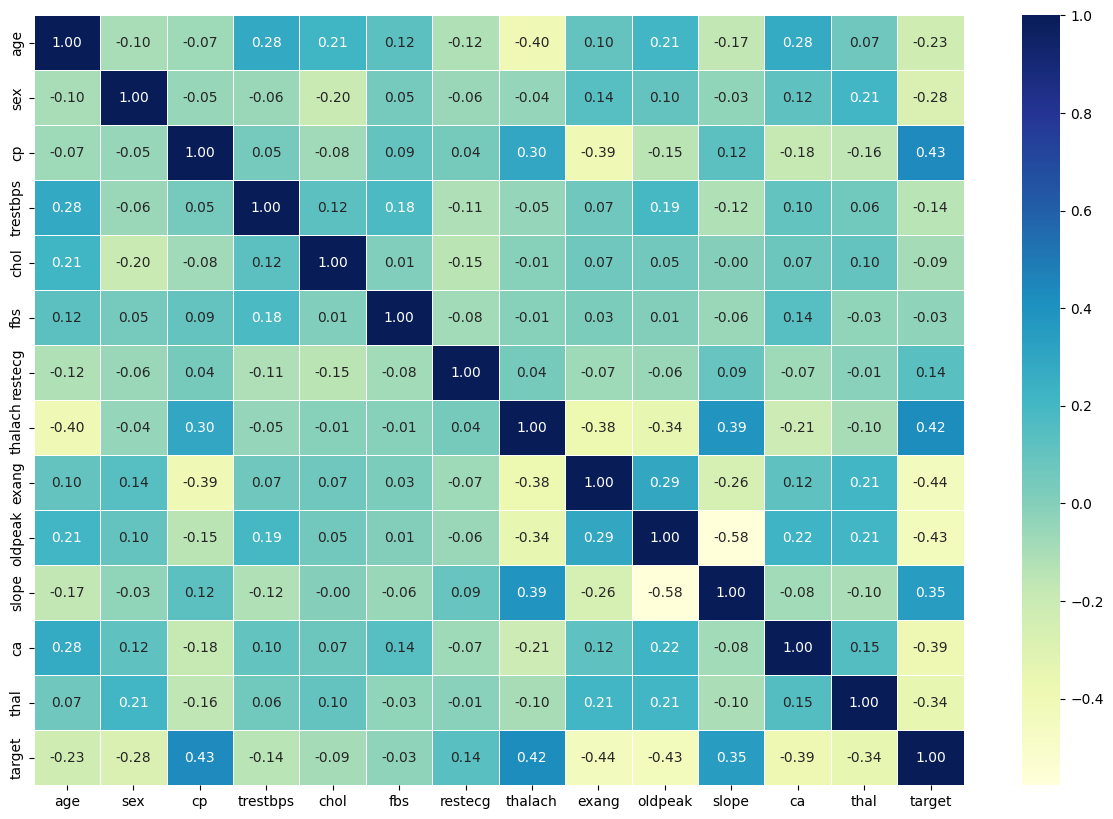

In [29]:
# lets draw correlation map
cor_map = df.corr()
home,room =plt.subplots(figsize=(15,10))
room = sns.heatmap(cor_map,
                  annot=True,
                linewidths=0.5,
                fmt = "0.2f",
                cmap="YlGnBu");

In [30]:
# split the data into test and train
x = df.drop("target", axis=1)
y = df["target"]

In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [32]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [33]:
# usind random seed, so the other could produce the same result
np.random.seed(7)
# split into test and train data
x_train,x_test,y_train,y_test = train_test_split(x ,y, test_size=0.2)

In [34]:
len(x_train)

242

In [35]:
len(x_test)

61

In [36]:
242/303

0.7986798679867987

# The model we are going to use

1.K.Nearest neighbors classifier

2.Random Forest classifier

3.Logistic Regression

In [37]:

# Input a model into a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression()}

# Create a function to evaluate the model
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(7)
    # Make a dictionary to store the model scores
    model_scores = {}

    # Loop through the models
    for name, model in models.items():
        model.fit(x_train, y_train)
        # Evaluate the model and append its score
        model_scores[name] = model.score(x_test, y_test)

    # Return the dictionary of model scores after evaluating all models
    return model_scores

In [38]:


model_scores = fit_and_score(models=models,
               x_train=x_train,
               x_test=x_test,
               y_train=y_train,
               y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5573770491803278,
 'Random Forest': 0.7213114754098361,
 'Logistic Regression': 0.7377049180327869}

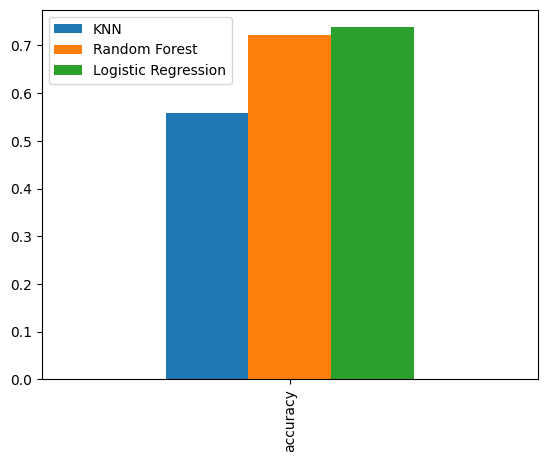

In [39]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.plot.bar();

# improving and tuning the model
Universal method that is used for all type of classification problems

  * hyperparameters tunning
  * Features improving

 Advance level

  *confusion_matrix

  *Cross validation

  *precision

  *Recall

  *F1

  *Classification report

  *ROC curve

 * hyperparameters tunning

 * Features improving

In [40]:

#create a list
train_score = []
test_score = []
#create range to be test for n_neighbours
nneighbors = range(1, 30)
# KNN instance
KNN = KNeighborsClassifier()
# Looping through the range
for i in nneighbors:
    KNN.set_params(n_neighbors = i)
    # run the fit for its value
    KNN.fit(x_train,y_train)
    # update the training score
    train_score.append(KNN.score(x_train,y_train))
    # update the test score
    test_score.append(KNN.score(x_test,y_test))

In [41]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

In [42]:
test_score

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327]

max KNN score:70.49%


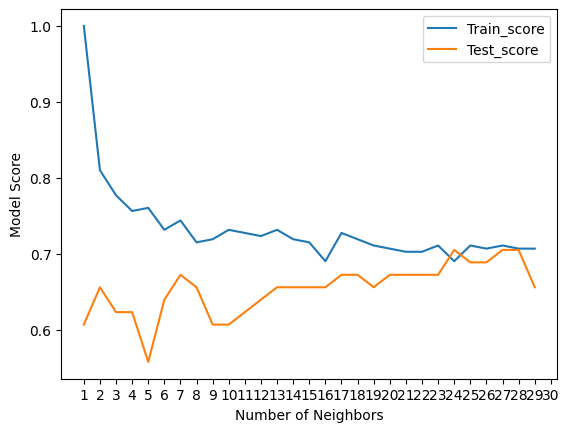

In [45]:
plt.plot(nneighbors, train_score, label="Train_score")
plt.plot(nneighbors, test_score, label="Test_score")
plt.xticks(np.arange(1, 31, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()
print(f"max KNN score:{max(test_score)*100:0.2f}%")

# hyperparameters tunning using RandomizedSearchCV

* Logistic Regression
* RandomForestClassifier

In [5]:

LR_hp = {
    "C":np.logspace(-4, 4, 20),
    "solver":["liblinear"],
}
RFC_hp = {
    "n_estimators": np.arange(10, 1600, 100),
    "max_depth": [None, 3, 5, 6, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
}

In [46]:
# tune logistic Regression
np.random.seed(7)
# Lets use RSCV to tune hp
lr = RandomizedSearchCV(LogisticRegression(),
                        param_distributions=LR_hp,
                        cv=5,
                        n_iter=20,
                        verbose=True)
# fit the random HP search model for LR
lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [48]:
lr.score(x_test,y_test)

0.7540983606557377

In [47]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [49]:
# tune Random Forest Classifier
np.random.seed(7)
# Lets use RSCV to tune hp
rfc = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=RFC_hp,
                        cv=5,
                        n_iter=20,
                        verbose=True)
# fit the random HP search model for LR
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [50]:
rfc.score(x_test,y_test)

0.7049180327868853

In [51]:
rfc.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 6}

* KNN: 0.5573770491803278, # we already dropped it

* Random Forest: 0.7213114754098361 after hyperparameters tunning= 0.7049180327868853


* Logistic Regression:0.7377049180327869 after hyperparameters tunning=0.7540983606557377

# by hand hyperparameters tunning
* done it been there, see it all

# RandomizedSearchCV
* done it been there, see it all

# GridSearchCV
* Lets try this one

In [52]:
# tune logistic Regression using GridSearchCV
np.random.seed(7)
# Lets use GSCV to tune hp
lr_gs = GridSearchCV(LogisticRegression(),
                        param_grid=LR_hp,
                        cv=5,
                        verbose=True)
# fit the random HP search model for LR
lr_gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [53]:
lr_gs.score(x_test,y_test)

0.7540983606557377

In [54]:
lr_gs.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [55]:
# tune Random Forest Classifier using GridSearchCV
np.random.seed(7)
# Lets use GSCV to tune hp
RFC_hp = {
    "n_estimators": np.arange(1, 101, 50),
    "max_depth": [None, 3, 50],
    "min_samples_split": np.arange(2, 8, 2),
    "min_samples_leaf": np.arange(1, 7, 2),
}

RFC_gs = GridSearchCV(RandomForestClassifier(),
                        param_grid=RFC_hp,
                        cv=5,
                        verbose=True)
# fit the random HP search model for LR
RFC_gs.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

In [56]:
RFC_gs.score(x_test,y_test)

0.7377049180327869

In [57]:
RFC_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 51}

# improving and tuning the model
Universal method that is used for all type of classification problems

  # hyperparameters tunning
  * done it been there
  # Features improving
  * discussed it in last

 Advance level

  *confusion_matrix

  *ROC curve

  *Cross validation

  *precision

  *Recall

  *F1

  *Classification report

In [79]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [85]:
!pip install --upgrade scikit-learn

In [88]:
# plotting the Area under the curve
lr_gs.predict(x_test)
plot_roc_curve(lr_gs, x_test, y_test)

NameError: ignored